In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv(r"C:\Users\dece2\OneDrive\Desktop\Data_Analysis_projects\SuperStore\train.csv")
#filling Missed Value
df['Postal Code'] = df['Postal Code'].fillna(0)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
if (df.duplicated().sum() > 0):
    print('dublicate exists')
else:
    print('dublicate not exists')

dublicate not exists


3. Trend Analysis
Monthly and Yearly Sales Trends: Break down sales by month and year to identify peak seasons.
Order vs. Ship Date Lag: Calculate the time taken to ship an order and analyze shipping delays by region and ship mode.

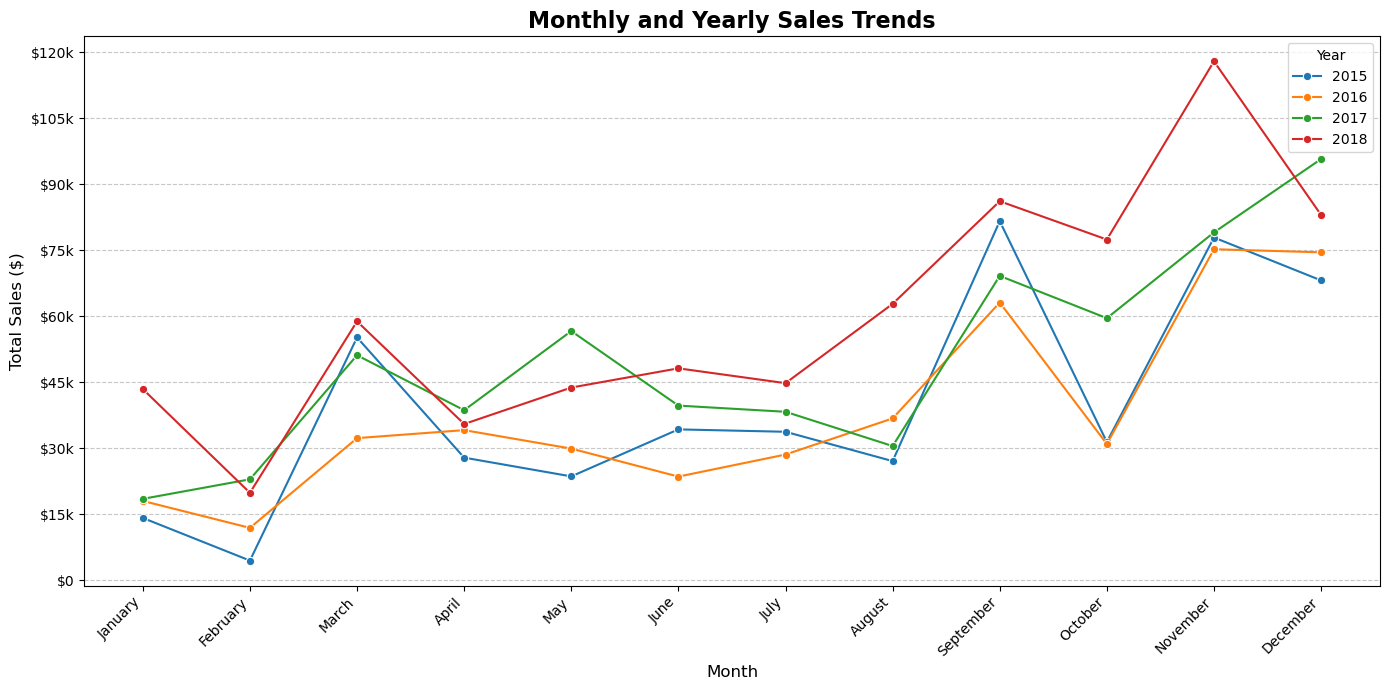

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Ensure the Order Date column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Group by Year and Month to calculate total sales
monthly_sales = df.groupby(['Year', 'Month'], sort=False)['Sales'].sum().reset_index()

# Order months for proper plotting
months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=months_order, ordered=True)

# Function to format the y-axis with k and $ (removes trailing zero after decimal point)
def currency_formatter(x, pos):
    if x >= 1000:
        return f"${x/1000:.0f}k"  # Use .0f to avoid decimal point
    return f"${x:.0f}"

# Plot Yearly Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o', palette='tab10')
plt.title('Monthly and Yearly Sales Trends', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Apply the custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Use MaxNLocator to control the y-axis ticks and make sure the formatting works properly
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
